### Linear Regression Model

#### Author: Kirti Gupta

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###  Importing dataset

In [2]:
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data=pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Plotting a 2D graph to see a relationship between the variables.

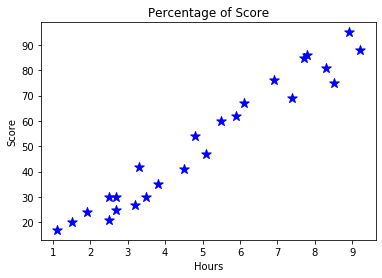

In [52]:
plt.scatter(data.Hours, data.Scores, c = 'b', s = 100, marker = '*')
plt.title('Percentage of Score')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

There is a linear relationship between the number of hours and percentage of scores

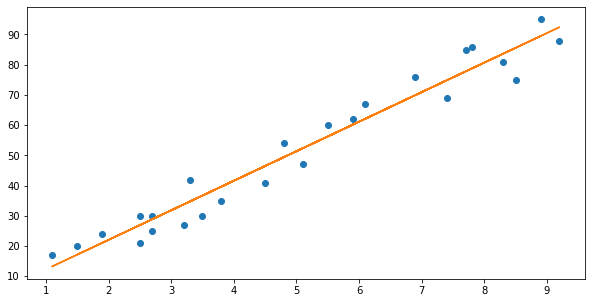

In [4]:
#Plotting a regression line
plt.figure(figsize=(10,5))
x = np.array(data.Hours)
y = np.array(data.Scores)
plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)
plt.show()

#### Preparing a Data

In [24]:
X = data.iloc[:, :-1].values  
Y= data.iloc[:, 1].values 

In [25]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split( X,
                                                  Y,
                                                  test_size = 0.2,
                                                  random_state = 123 )

#### Model Building

In [26]:
# Building Models
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit( train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
linreg.coef_

array([9.60171878])

In [28]:
linreg.predict(train_X) 

array([82.38965478, 55.5048422 , 59.34552971, 36.30140465, 84.30999854,
       77.58879539, 45.90312342, 26.69968587, 28.62002962, 13.25727958,
       28.62002962, 26.69968587, 51.66415469, 76.62862351, 73.74810788,
       20.9386546 , 91.03120168, 68.94724849, 33.42088901, 34.38106089])

In [29]:
linreg.intercept_

2.695388922345728

In [32]:
linreg.predict(test_X)

array([17.09796709, 48.78363906, 39.18192028, 61.26587347, 88.15068605])

In [35]:
#Predicting the test cases
test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': linreg.predict(test_X) } )

In [36]:
test_pred

,actual,predicted
0,20,17.097967
1,54,48.783639
2,35,39.181920
3,67,61.265873
4,95,88.150686


In [37]:
test_pred = test_pred.reset_index()

In [38]:
test_pred

,index,actual,predicted
0,0,20,17.097967
1,1,54,48.783639
2,2,35,39.181920
3,3,67,61.265873
4,4,95,88.150686


####  Evaluating the accuracy of a model

In [41]:
y_pred = linreg.predict(test_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print ('MSE:', metrics.mean_squared_error(test_y, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

MAE: 4.976750923680405
MSE: 26.582796488881115
RMSE: 5.155850704673393


#### Predicting a score if studied 9.25 hrs/day

In [50]:
hours=9.25
hours=np.array(hours).reshape(1,-1)
hr_predict=linreg.predict(hours)
hr_predict

array([91.51128762])